In [1]:
# import the required libraries
import pandas as pd

In [2]:
# import and Read the data 
retail_data = pd.read_csv("Walmart_Store_sales.csv")

In [3]:
# View the first 10 rows
retail_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
# Description of the data
retail_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Question 1
Which store has the maximum sale?

In [5]:
# Row with the maximum sale
print(retail_data[retail_data.Weekly_Sales == retail_data.Weekly_Sales.max()])

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   

            CPI  Unemployment  
1905  182.54459         8.724  


Store 14 has the maximum sale

# Question 2
Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [6]:
maxstd=pd.DataFrame(retail_data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

In [7]:
#Just resetting the index.
maxstd = maxstd.reset_index()

In [8]:
# coefficient of Variance = mean / standard Deviation
maxstd['COV'] = (maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

In [9]:
# df.rename(columns={"Weekly":"NewName"})

In [10]:
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      COV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

In [11]:
retail_data.Date = pd.to_datetime(retail_data.Date)

Store 14 has the maximum standard deviation and its coefficient of Variation is 15.71

# Question 3
Which store has a good quarterly growth rate?

In [12]:
# create a new column which shows the year and quarter
retail_data['quarter'] = pd.PeriodIndex(retail_data.Date, freq='Q')

In [13]:
T2012Q2 = retail_data.loc[retail_data['quarter'] == "2012Q2", ["Weekly_Sales", 'Store']]

In [14]:
T2012Q2

,Weekly_Sales,Store
100,1550369.92,1
113,1899676.88,1
114,1621031.70,1
115,1521577.87,1
116,1468928.37,1
...,...,...
6415,821498.18,45
6416,822569.16,45
6417,773367.71,45
6418,843361.10,45


In [15]:
T2012Q3 = retail_data.loc[retail_data['quarter'] == "2012Q3", ["Weekly_Sales", 'Store']]

In [16]:
T2012Q3

,Weekly_Sales,Store
109,1675431.16,1
122,1697230.96,1
127,1527014.04,1
128,1497954.76,1
129,1439123.71,1
...,...,...
6426,734297.87,45
6427,766512.66,45
6428,702238.27,45
6429,723086.20,45


In [17]:
T2012Q2_sum_per_store = pd.DataFrame(T2012Q2.groupby('Store')['Weekly_Sales'].sum())
T2012Q2_sum_per_store.reset_index(inplace=True)

In [18]:
T2012Q3_sum_per_store = pd.DataFrame(T2012Q3.groupby('Store')['Weekly_Sales'].sum())
T2012Q3_sum_per_store.reset_index(inplace=True)

In [19]:
T2012Q2_sum_per_store

,Store,Weekly_Sales
0,1,21036965.58
1,2,25085123.61
2,3,5562668.16
3,4,28384185.16
4,5,4427262.21
5,6,20728970.16
6,7,7613593.92
7,8,11934275.61
8,9,7431320.13
9,10,23598433.93


In [20]:
T2012Q3_sum_per_store

,Store,Weekly_Sales
0,1,18633209.98
1,2,22396867.61
2,3,4966495.93
3,4,25652119.35
4,5,3880621.88
5,6,18341221.11
6,7,7322393.92
7,8,10873860.34
8,9,6528239.56
9,10,21169356.45


In [21]:
T2012Q2_sum_per_store['Weekly_Sales_Q3'] = T2012Q3_sum_per_store['Weekly_Sales']

In [22]:
T2012Q2_sum_per_store

,Store,Weekly_Sales,Weekly_Sales_Q3
0,1,21036965.58,18633209.98
1,2,25085123.61,22396867.61
2,3,5562668.16,4966495.93
3,4,28384185.16,25652119.35
4,5,4427262.21,3880621.88
5,6,20728970.16,18341221.11
6,7,7613593.92,7322393.92
7,8,11934275.61,10873860.34
8,9,7431320.13,6528239.56
9,10,23598433.93,21169356.45


In [23]:
T2012Q2_sum_per_store['Growth Rate'] = ((T2012Q2_sum_per_store.Weekly_Sales_Q3 - T2012Q2_sum_per_store.Weekly_Sales)/T2012Q2_sum_per_store.Weekly_Sales)*100

In [24]:
T2012Q2_sum_per_store

,Store,Weekly_Sales,Weekly_Sales_Q3,Growth Rate
0,1,21036965.58,18633209.98,-11.426342
1,2,25085123.61,22396867.61,-10.716535
2,3,5562668.16,4966495.93,-10.717379
3,4,28384185.16,25652119.35,-9.625310
4,5,4427262.21,3880621.88,-12.347142
5,6,20728970.16,18341221.11,-11.518899
6,7,7613593.92,7322393.92,-3.824738
7,8,11934275.61,10873860.34,-8.885460
8,9,7431320.13,6528239.56,-12.152357
9,10,23598433.93,21169356.45,-10.293384


In [25]:
T2012Q2_sum_per_store.loc[T2012Q2_sum_per_store['Growth Rate']==T2012Q2_sum_per_store['Growth Rate'].max()]

,Store,Weekly_Sales,Weekly_Sales_Q3,Growth Rate
15,16,6626133.44,6441311.11,-2.789294


The Store with good quarterly growth rate is Store 16

# Question 4
Find out the holiday that has the higher sales than the mean sales in non-holiday season ll together 

In [26]:
import datetime as dt

In [27]:
Holiday_Week = retail_data.loc[retail_data['Holiday_Flag']==1]
Holiday_Week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011Q4
...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011Q3
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011Q4
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011Q4
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2012Q4


In [28]:
Non_Holiday_Week = retail_data.loc[retail_data['Holiday_Flag']==0]
Non_Holiday_Week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010Q4
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4


In [29]:
list(Holiday_Week.Date.unique())

[numpy.datetime64('2010-12-02T00:00:00.000000000'),
 numpy.datetime64('2010-10-09T00:00:00.000000000'),
 numpy.datetime64('2010-11-26T00:00:00.000000000'),
 numpy.datetime64('2010-12-31T00:00:00.000000000'),
 numpy.datetime64('2011-11-02T00:00:00.000000000'),
 numpy.datetime64('2011-09-09T00:00:00.000000000'),
 numpy.datetime64('2011-11-25T00:00:00.000000000'),
 numpy.datetime64('2011-12-30T00:00:00.000000000'),
 numpy.datetime64('2012-10-02T00:00:00.000000000'),
 numpy.datetime64('2012-07-09T00:00:00.000000000')]

In [30]:
from matplotlib import pyplot as plt
import time
retail_data['Date'] = pd.to_datetime(retail_data.Date)

In [31]:
def plot_line(df, holiday_dates, holiday_label):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df['Date'], df['Weekly_Sales'], label=holiday_label)
    
    for day in holiday_dates:
        day = dt.datetime.strptime(day, '%d-%m-%Y').date()
        plt.axvline(x=day, linestyle='--', c='r')
        
    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
#     xfmt = dates.DateFormatter('%d-%m-%y')
#     ax.xaxis.set_major_formatter(xfmt)
#     ax.xaxis.set_major_locator(dates.Daylocator(1))
#     plt.gcf().autofmt_xdates(rotation=90)
    plt.show()

In [32]:
total_sales = retail_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl=['12-2-2010', '11-2-2011', '10-2-2012']
Labor_Day = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

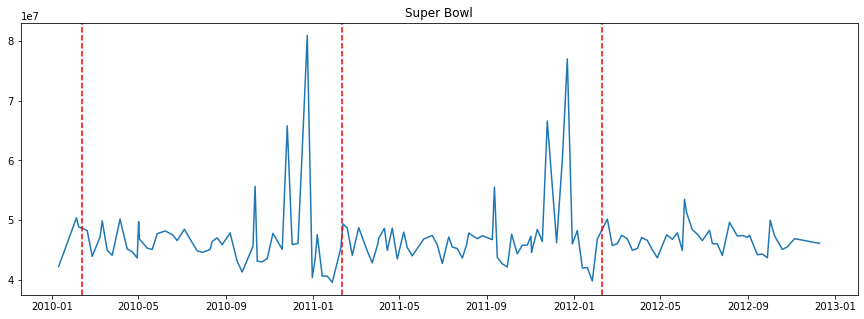

In [33]:
plot_line(total_sales, Super_Bowl, 'Super Bowl')

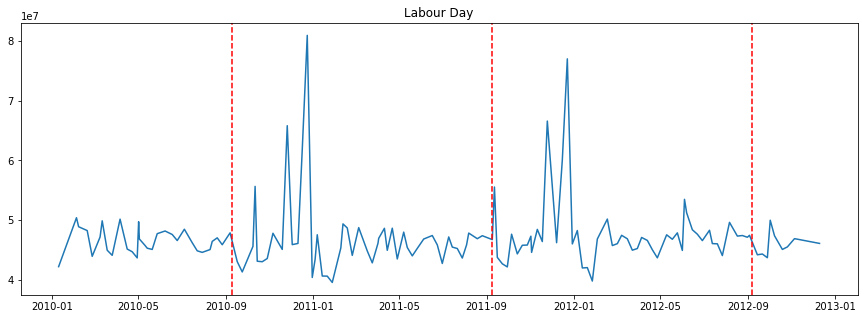

In [34]:
plot_line(total_sales, Labor_Day, 'Labour Day')

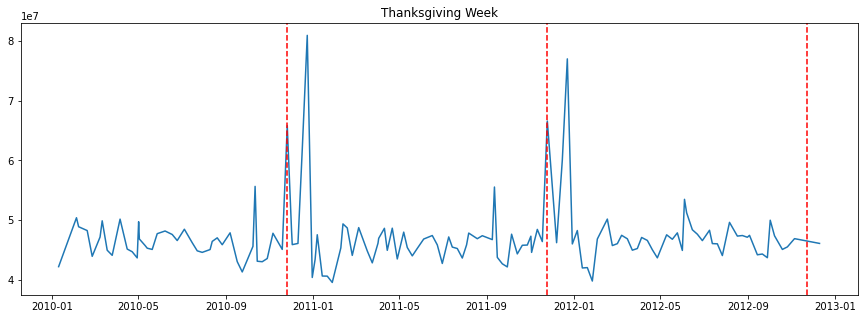

In [35]:
plot_line(total_sales, Thanksgiving, 'Thanksgiving Week')

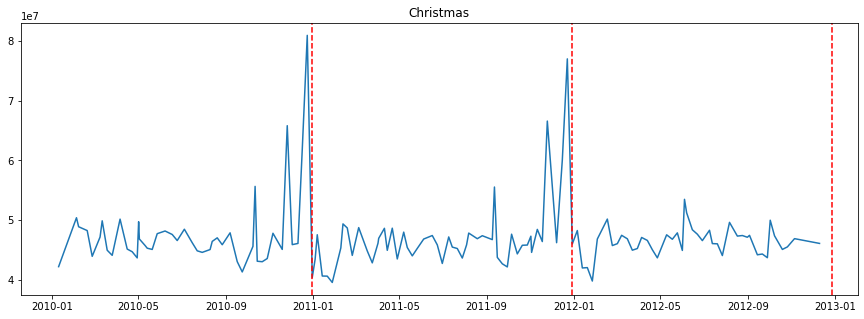

In [36]:
plot_line(total_sales, Christmas, 'Christmas')

Text(0, 0.5, 'Weekly_Sales')

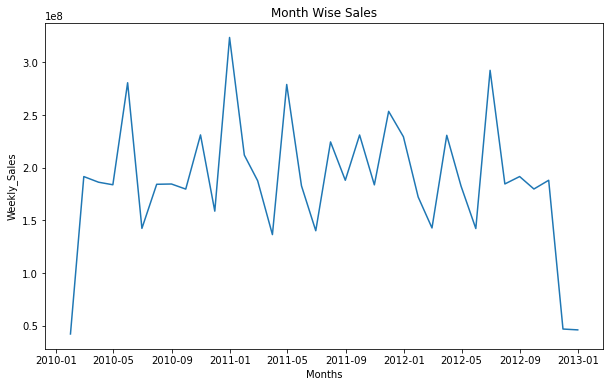

In [37]:
from matplotlib import pyplot as plt
pd.DatetimeIndex(retail_data['Date'])
monthly = retail_data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')


Text(0, 0.5, 'Weekly_Sales')

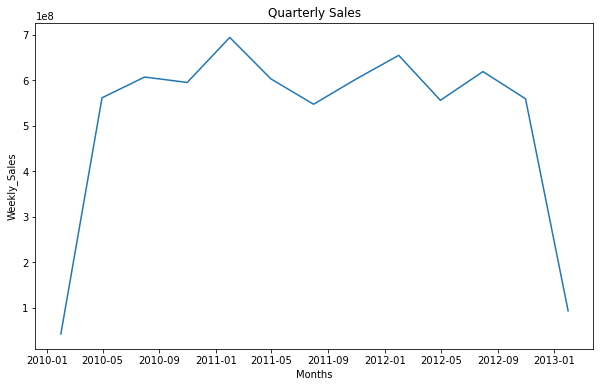

In [38]:
quarterly = retail_data.groupby(pd.Grouper(key='Date', freq='3M')).sum()# groupby each 3e month
quarterly=quarterly.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
X = quarterly['Date']
Y = quarterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quarterly Sales')
plt.xlabel('Months')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

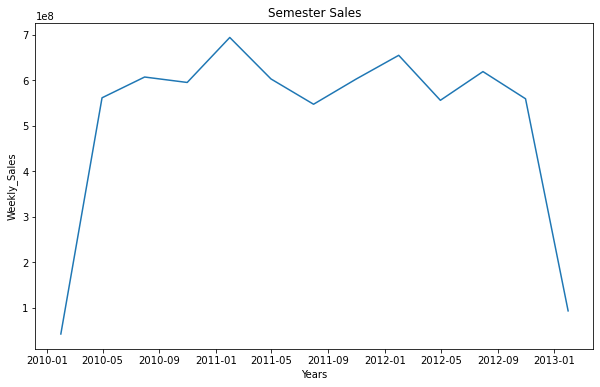

In [39]:
semesterly = retail_data.groupby(pd.Grouper(key='Date', freq='3M')).sum()# groupby each 3e month
semesterly=semesterly.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
X = semesterly['Date']
Y = semesterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Sales')
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

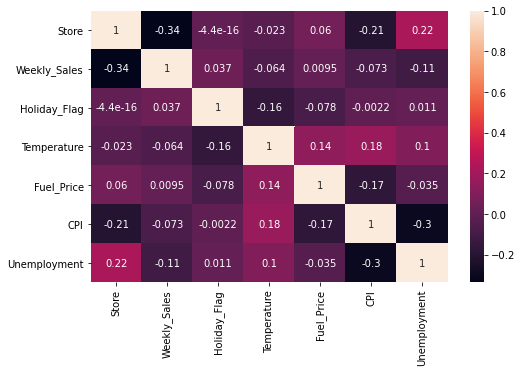

In [40]:
import seaborn as sns
corr = retail_data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True)
plt.show()

In [41]:
retail_data['Day']=retail_data['Date'].dt.day
retail_data = retail_data.drop('Date',axis=1)

In [42]:
retail_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,3
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012Q3,28
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012Q2,10
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012Q4,10
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012Q4,19


In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, r2_score


In [44]:
df_v2 = pd.get_dummies(retail_data, columns = ['Holiday_Flag','Store'])
y = df_v2['Weekly_Sales']
X= df_v2.drop(['Weekly_Sales', 'quarter'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
X

,Temperature,Fuel_Price,CPI,Unemployment,Day,Holiday_Flag_0,Holiday_Flag_1,Store_1,Store_2,Store_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,42.31,2.572,211.096358,8.106,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39.93,2.514,211.289143,8.106,19,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,26,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,28,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,64.89,3.985,192.170412,8.667,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,54.47,4.000,192.327265,8.667,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,56.47,3.969,192.330854,8.667,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = ln_model.predict(X_test)
print("r2 score:", r2_score(y_test,y_pred))

r2 score: 0.9284252156717872
